In [1]:
import os
from pathlib import Path
import pandas as pd
df = pd.read_csv('C:/Users/yuvyu/Downloads/City_day.csv', low_memory=False)

In [2]:
df = df[['PM2.5','Air_quality','O3']].dropna()
rating = []
for row in df['Air_quality']:
    if row == 'Severe':   rating.append(0)
    elif row == 'Very Poor':
        rating.append(1)
    elif row == 'Poor':
        rating.append(2)
    elif row == 'Moderate':
        rating.append(3)
    elif row == 'Good':
        rating.append(4) 
    elif row == 'Satisfactory':
        rating.append(5)

df['air_quality_numeric'] = rating

print(df.shape)

(20700, 4)


In [3]:
print(df.head(5))

     PM2.5 Air_quality      O3  air_quality_numeric
28   83.13        Poor   59.76                    2
29   79.84   Very Poor   97.07                    1
30   94.52      Severe  111.33                    0
31  135.99      Severe  102.70                    0
32  178.33      Severe  107.38                    0


In [4]:
print(list(df.columns.values))

['PM2.5', 'Air_quality', 'O3', 'air_quality_numeric']


<AxesSubplot:ylabel='None'>

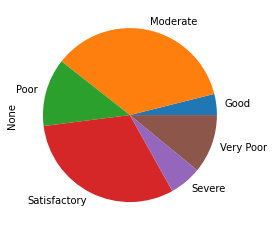

In [5]:
#creating a pie chart of the patients by age
df = df[df['Air_quality'] != '?']
df.groupby('Air_quality').size().plot(kind='pie')

In [6]:
for column_name in df.columns:
    if df[column_name].dtypes=='object':
        a=df[column_name].unique()
        a= len(a)
        print(column_name+" has "+str(a)+" unique values.")

Air_quality has 6 unique values.


In [7]:
y = df['air_quality_numeric']
X = df.drop(['Air_quality'],1)

print(X.head(5))
print(y.head(5))

     PM2.5      O3  air_quality_numeric
28   83.13   59.76                    2
29   79.84   97.07                    1
30   94.52  111.33                    0
31  135.99  102.70                    0
32  178.33  107.38                    0
28    2
29    1
30    0
31    0
32    0
Name: air_quality_numeric, dtype: int64


In [8]:
#Encode target values and convert to one hot encoding.
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_y)

Using TensorFlow backend.


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [10]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(15525,)
(15525, 3)
(5175,)
(5175, 3)


In [11]:
print(X_train.head(5))

print('-----------------')
print(df['air_quality_numeric'].value_counts())

        PM2.5     O3  air_quality_numeric
9548    87.55  69.36                    2
25022   82.46   5.02                    2
23956   66.21  16.42                    3
15954   45.82  48.86                    3
18275  101.36  47.61                    2
-----------------
3    7346
5    6436
2    2611
1    2261
0    1236
4     810
Name: air_quality_numeric, dtype: int64


In [12]:
from sklearn.linear_model import SGDClassifier
import timeit

sgd_clf = SGDClassifier(random_state=42)
tic = timeit.default_timer()

y_predict = sgd_clf.fit(X_train, y_train)
sgd_clf.predict(X_test)
toc = timeit.default_timer()-tic
print ("SGD Classifier train time in seconds: ",toc)

SGD Classifier train time in seconds:  0.4691977999999999


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix,class_names,figsize=(5,3),fontsize=10):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return fig


CROSS VAL SCORE: 
[0.60032206 0.76618357 0.70177134 0.67342995 0.77133655]
CONFUSION MATRIX: 
[[ 275  195    0  447    8    0]
 [ 166  564    0  970    4    0]
 [   0  457    0 1499   16    0]
 [   0  264    0 5206   70    0]
 [   0    0    0  436  159    1]
 [   0    8    0    0    0 4780]]


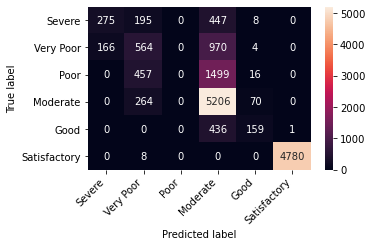

Precision Score: 
0.7075040257648954
Recall Score: 
0.7075040257648954
f1 score: 
0.7075040257648954


In [14]:
#Confusion Matrix -> On y-axis, confusion matrix has the actual values, and on the x-axis, the values given by the predictor. Therefore, counts on the diagonal are number of correct predictions.
from sklearn.metrics import classification_report
class_names = ['Severe','Very Poor', 'Poor', 'Moderate','Good','Satisfactory']
from sklearn.model_selection import cross_val_score
print("CROSS VAL SCORE: ")
print(cross_val_score(sgd_clf, X_train, y_train,  scoring="accuracy"))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))
better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)
from sklearn.metrics import precision_score, recall_score
print("Precision Score: ")
print(precision_score(y_train, y_train_pred, average='micro'))
print("Recall Score: ")
print(recall_score(y_train, y_train_pred, average='micro')) 

from sklearn.metrics import f1_score
print("f1 score: ")
print(f1_score(y_train, y_train_pred, average='micro'))
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

In [15]:
print("\t\tSGD Classification Report:")
sgd =  SGDClassifier(random_state=42)
y_predict = sgd.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict, target_names=class_names))

		SGD Classification Report:
              precision    recall  f1-score   support

      Severe       0.84      0.53      0.65       311
   Very Poor       0.00      0.00      0.00       557
        Poor       0.00      0.00      0.00       639
    Moderate       0.56      0.95      0.71      1806
        Good       0.48      0.70      0.57       214
Satisfactory       1.00      0.98      0.99      1648

    accuracy                           0.70      5175
   macro avg       0.48      0.53      0.49      5175
weighted avg       0.59      0.70      0.62      5175



C:\Users\yuvyu\anaconda3\envs\cmps320\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 RandomForest train time in seconds:  0.9701738999999989
[1.         1.         0.99942029]
CONFUSION MATRIX: 
[[ 925    0    0    0    0    0]
 [   0 1704    0    0    0    0]
 [   0    0 1972    0    0    0]
 [   0    0    0 5540    0    0]
 [   0    0    0    3  593    0]
 [   0    0    0    0    0 4788]]


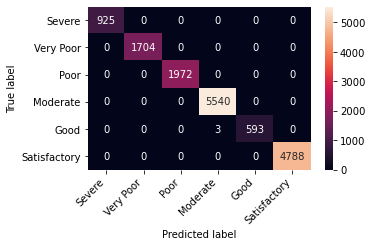

PRECISION SCORE: 
0.9998067632850242
RECALL SCORE: 
0.9998067632850242
F1 score: 
0.9998067632850242


In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
tic=timeit.default_timer()

rfc.fit(X_train, y_train)
rfc.predict(X_test)
toc=timeit.default_timer()-tic
print(" RandomForest train time in seconds: ",toc)

print(cross_val_score(rfc, X_train, y_train, cv=3, scoring="accuracy"))
y_probas_forest = cross_val_predict(rfc, X_train, y_train, cv=3, method="predict_proba")



y_train_pred = cross_val_predict(rfc, X_train, y_train, cv=3)
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))


In [17]:
from sklearn.preprocessing import StandardScaler
StdSc= StandardScaler()

X_scaled= StdSc.fit_transform(X_train)
X_scaled_test = StdSc.fit_transform(X_test)
sgd_scaled = SGDClassifier(random_state=42)
tic=timeit.default_timer()

sgd_scaled.fit(X_scaled, y_train)
sgd_scaled.predict(X_scaled_test)
toc = timeit.default_timer()-tic
print(" SGD classifier with scaled values train time in seconds: ",toc)

 SGD classifier with scaled values train time in seconds:  0.11080259999999953


In [18]:
y_scores = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3, method="decision_function")

[0.77062802 0.77758454 0.77487923]
[[ 634    6    0  285    0    0]
 [   0 1219    4  481    0    0]
 [   0  354   34 1584    0    0]
 [   0   26  167 5347    0    0]
 [   0    1    1  594    0    0]
 [   0    0    0    0    0 4788]]


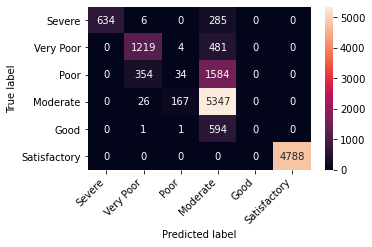

0.7743639291465378
0.7743639291465378
0.7743639291465378


In [19]:
print(cross_val_score(sgd_scaled, X_scaled, y_train, cv=3, scoring="accuracy"))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_train_pred, average='micro'))
print(recall_score(y_train, y_train_pred, average='micro')) 

from sklearn.metrics import f1_score
print(f1_score(y_train, y_train_pred, average='micro'))
y_scores = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3, method="decision_function")

[1.         1.         0.99942029]
CONFUSION MATRIX: 
[[ 925    0    0    0    0    0]
 [   0 1704    0    0    0    0]
 [   0    0 1972    0    0    0]
 [   0    0    0 5540    0    0]
 [   0    0    0    3  593    0]
 [   0    0    0    0    0 4788]]


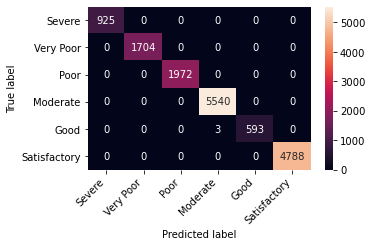

PRECISION SCORE: 
0.9998067632850242
RECALL SCORE: 
0.9998067632850242
F1 score: 
0.9998067632850242


In [20]:
#Random Forest after scaling:

rfc.fit(X_scaled, y_train)
rfc.predict(X_scaled_test)

print(cross_val_score(rfc, X_scaled, y_train, cv=3, scoring="accuracy"))
y_probas_forest = cross_val_predict(rfc, X_scaled, y_train, cv=3, method="predict_proba")

y_train_pred = cross_val_predict(rfc, X_scaled, y_train, cv=3)
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

C:\Users\yuvyu\anaconda3\envs\cmps320\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yuvyu\anaconda3\envs\cmps320\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC classifier train time in seconds:  0.17053359999999884


C:\Users\yuvyu\anaconda3\envs\cmps320\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yuvyu\anaconda3\envs\cmps320\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CONFUSION MATRIX: 
[[ 524    0    0  401    0    0]
 [ 915    0   71  718    0    0]
 [   0    0  379 1593    0    0]
 [   0    8  301 5231    0    0]
 [   0    0    0  593    0    3]
 [   0    0    0    0    0 4788]]


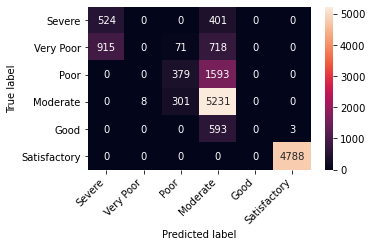

PRECISION SCORE: 
0.7035104669887279
RECALL SCORE: 
0.7035104669887279
F1 score: 
0.7035104669887279


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

StdSc= StandardScaler()

X_scaled= StdSc.fit_transform(X_train)
X_scaled_test = StdSc.fit_transform(X_test)
class_names = ['Severe','Very Poor', 'Poor', 'Moderate','Good','Satisfactory']


import timeit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

tic=timeit.default_timer()

svm_clf.fit(X_scaled, y_train)

svm_clf.predict(X_scaled_test)
toc = timeit.default_timer()-tic
print("LinearSVC classifier train time in seconds: ",toc)
prediction = svm_clf.predict(X_scaled)
svm_clf.score(X_train, y_train)


y_train_pred = cross_val_predict(svm_clf, X_scaled, y_train, cv=3)
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

In [22]:
svm_clf.score(X_scaled_test, y_test)

0.7130434782608696

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
tic = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors = 6).fit(X_scaled, y_train)
print(knn.predict(X_scaled_test))
toc = timeit.default_timer()-tic
print("KNN Classifier train time in seconds: ",toc)

[5 3 5 ... 5 3 5]
KNN Classifier train time in seconds:  0.35166990000000453


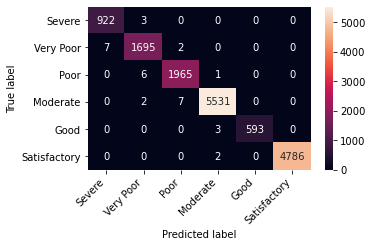

CONFUSION MATRIX: 
[[ 922    3    0    0    0    0]
 [   7 1695    2    0    0    0]
 [   0    6 1965    1    0    0]
 [   0    2    7 5531    0    0]
 [   0    0    0    3  593    0]
 [   0    0    0    2    0 4786]]
PRECISION SCORE: 
0.9978743961352657
RECALL SCORE: 
0.9978743961352657
F1 score: 
0.9978743961352657


In [24]:
y_train_pred = cross_val_predict(knn, X_scaled, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

GaussianNB training time:  0.014872099999998056
[5 3 5 ... 5 3 5]
1.0


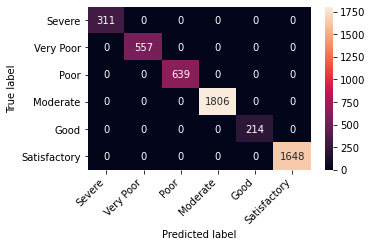

CONFUSION MATRIX: 
[[ 925    0    0    0    0    0]
 [   0 1704    0    0    0    0]
 [   0    0 1972    0    0    0]
 [   0    0    0 5540    0    0]
 [   0    0    0    0  596    0]
 [   0    0    0    0    0 4788]]
PRECISION SCORE: 
1.0
RECALL SCORE: 
1.0
F1 score: 
1.0


In [25]:
from sklearn.naive_bayes import GaussianNB 

tic = timeit.default_timer()
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
toc = timeit.default_timer()-tic
print("GaussianNB training time: ",toc)
print(gnb_predictions)  
# accuracy on X_test 
accuracy = gnb.score(X_test,y_test)
print(accuracy)
cm = confusion_matrix(y_test,gnb_predictions)
y_train_pred = cross_val_predict(gnb, X_scaled, y_train, cv=3)
better_cf = print_confusion_matrix(cm, class_names)

print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

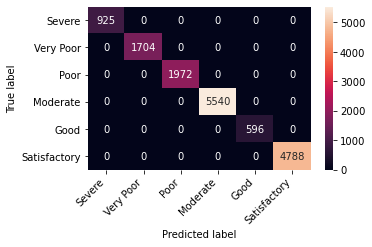

CONFUSION MATRIX: 
[[ 925    0    0    0    0    0]
 [   0 1704    0    0    0    0]
 [   0    0 1972    0    0    0]
 [   0    0    0 5540    0    0]
 [   0    0    0    0  596    0]
 [   0    0    0    0    0 4788]]
PRECISION SCORE: 
1.0
RECALL SCORE: 
1.0
F1 score: 
1.0


In [26]:
#NB after scaling.

gnb = GaussianNB().fit(X_scaled, y_train)
gnb_predictions = gnb.predict(X_scaled_test)

cm = confusion_matrix(y_train,y_train_pred)

better_cf = print_confusion_matrix(cm, class_names)

print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

In [27]:
from sklearn import tree

In [28]:
classification_tree = tree.DecisionTreeClassifier()

In [29]:
tic = timeit.default_timer()
classification_tree = classification_tree.fit(X_scaled, y_train)
toc = timeit.default_timer()-tic
print("Decision Tree training time: ",toc)


Decision Tree training time:  0.025080500000001393


0.3184541062801932


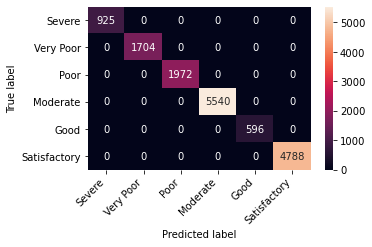

CONFUSION MATRIX: 
[[ 925    0    0    0    0    0]
 [   0 1704    0    0    0    0]
 [   0    0 1972    0    0    0]
 [   0    0    0 5540    0    0]
 [   0    0    0    0  596    0]
 [   0    0    0    0    0 4788]]
PRECISION SCORE: 
1.0
RECALL SCORE: 
1.0
F1 score: 
1.0


In [30]:
accuracy = classification_tree.score(X_test,y_test)
y_train_pred = cross_val_predict(classification_tree, X_scaled, y_train, cv=3)
print(accuracy)
tree_predictions = classification_tree.predict(X_test)
cm = confusion_matrix(y_train,y_train_pred)
y_train_pred = cross_val_predict(classification_tree, X_scaled, y_train, cv=3)
better_cf = print_confusion_matrix(cm, class_names)

print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

Extra Trees training time:  0.462766000000002
[5 3 5 ... 5 3 5]
0.9998067632850242


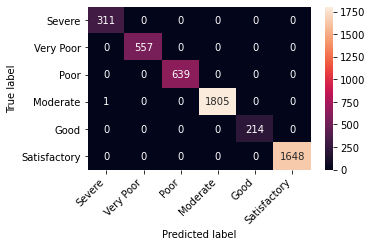

CONFUSION MATRIX: 
[[ 925    0    0    0    0    0]
 [   0 1704    0    0    0    0]
 [   0    0 1972    0    0    0]
 [   0    0    0 5540    0    0]
 [   0    0    0    0  595    1]
 [   0    0    0    0    1 4787]]
PRECISION SCORE: 
0.9998711755233495
RECALL SCORE: 
0.9998711755233495
F1 score: 
0.9998711755233495


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import timeit

tic = timeit.default_timer()
xtrtr = ExtraTreesClassifier().fit(X_train, y_train) 
xtrtr_predictions = xtrtr.predict(X_test) 
toc = timeit.default_timer()-tic
print("Extra Trees training time: ",toc)
print(xtrtr_predictions)  
# accuracy on X_test 
accuracy = xtrtr.score(X_test,y_test)
print(accuracy)
cm = confusion_matrix(y_test,xtrtr_predictions)
y_train_pred = cross_val_predict(xtrtr, X_scaled, y_train, cv=3)
better_cf = print_confusion_matrix(cm, class_names)

print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

In [32]:
print("\t\tExtra Trees Classification report:")
Extra_trees =  ExtraTreesClassifier()
y_predict = Extra_trees.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict, target_names=class_names))

		Extra Trees Classification report:
              precision    recall  f1-score   support

      Severe       1.00      1.00      1.00       311
   Very Poor       1.00      1.00      1.00       557
        Poor       1.00      1.00      1.00       639
    Moderate       1.00      1.00      1.00      1806
        Good       1.00      1.00      1.00       214
Satisfactory       1.00      1.00      1.00      1648

    accuracy                           1.00      5175
   macro avg       1.00      1.00      1.00      5175
weighted avg       1.00      1.00      1.00      5175

